# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# city_url = f"{url}appid={api_key}&q={city}&units={units}"


In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" #appid={weather_api_key}"
api_key= weather_api_key
units= 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(10)

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units={units}"
 
    # response= requests.get(city_url).json()
    # print(response)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat= city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | hami
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | blackwater
Processing Record 8 of Set 1 | itoman
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | hof
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | buala
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | iaciara
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | mogadishu
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | samusu
City not found. Skipping...
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | atuona
Processing Record 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-0.83,98,100,10.40,RU,1670623689
1,hami,42.8000,93.4500,23.49,44,95,6.87,CN,1670623690
2,kavieng,-2.5744,150.7967,82.89,75,100,8.95,PG,1670623690
3,hermanus,-34.4187,19.2345,67.80,85,0,3.29,ZA,1670623690
4,provideniya,64.3833,-173.3000,21.87,85,92,8.21,RU,1670623691


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-0.83,98,100,10.40,RU,1670623689
1,hami,42.8000,93.4500,23.49,44,95,6.87,CN,1670623690
2,kavieng,-2.5744,150.7967,82.89,75,100,8.95,PG,1670623690
3,hermanus,-34.4187,19.2345,67.80,85,0,3.29,ZA,1670623690
4,provideniya,64.3833,-173.3000,21.87,85,92,8.21,RU,1670623691


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

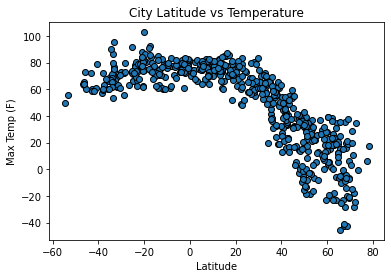

In [12]:
# Build scatter plot for latitude vs. temperature
Lat= city_data_df['Lat']
MaxTemp= city_data_df['Max Temp']
Humidity= city_data_df['Humidity']
Cloudiness= city_data_df['Cloudiness']
Windspeed= city_data_df['Wind Speed']

plt.scatter(Lat, MaxTemp, edgecolor='black' )

# Incorporate the other graph properties
plt.title('City Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

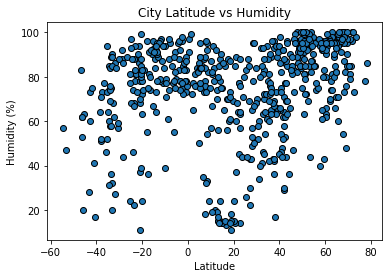

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(Lat, Humidity, edgecolor='black' )

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

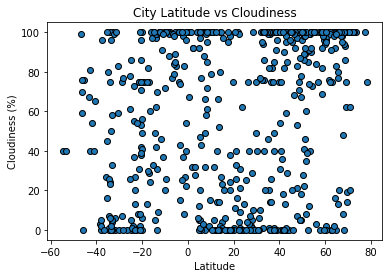

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(Lat, Cloudiness, edgecolor='black' )

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

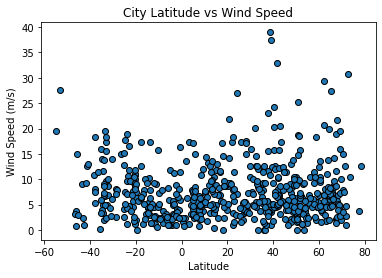

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(Lat, Windspeed, edgecolor='black' )

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-0.83,98,100,10.40,RU,1670623689
1,hami,42.8000,93.4500,23.49,44,95,6.87,CN,1670623690
4,provideniya,64.3833,-173.3000,21.87,85,92,8.21,RU,1670623691
7,itoman,26.1247,127.6694,68.38,88,75,17.27,JP,1670623693
8,qaanaaq,77.4840,-69.3632,6.53,78,100,3.65,GL,1670623693


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi= city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kavieng,-2.5744,150.7967,82.89,75,100,8.95,PG,1670623690
3,hermanus,-34.4187,19.2345,67.80,85,0,3.29,ZA,1670623690
5,avarua,-21.2078,-159.7750,77.05,88,75,5.75,CK,1670623691
6,blackwater,-23.5833,148.8833,79.07,68,37,10.69,AU,1670623692
12,buala,-8.1450,159.5921,83.19,74,100,3.80,SB,1670623694


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8627354024132318


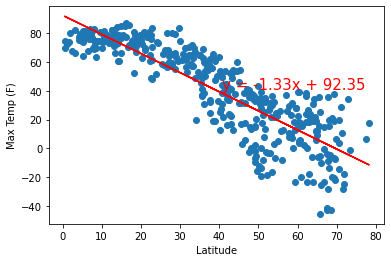

None


In [19]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi["Lat"]
y_values= northern_hemi["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values, y_values))

The r-squared is: 0.4395101825656025


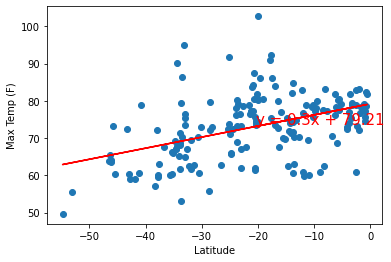

None


In [20]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi["Lat"]
y_values= southern_hemi["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values, y_values))

**Discussion about the linear relationship:** 

For the northern hemisphere the closer to the north pole (i.e. higher the latitude) the max temp drops. 
Alternatively, for the south pole the closer to the south pole (i.e. lower in latitude) the max temp drops. 
Essentially, the closer to a latitude of zero, in southern or northern hemisphere, the higher the temp.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.39275451965019453


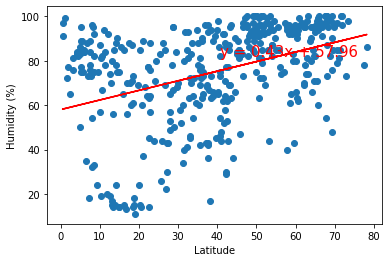

None


In [21]:
# Northern Hemisphere
x_values= northern_hemi["Lat"]
y_values= northern_hemi["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

The r-squared is: 0.4307698088112063


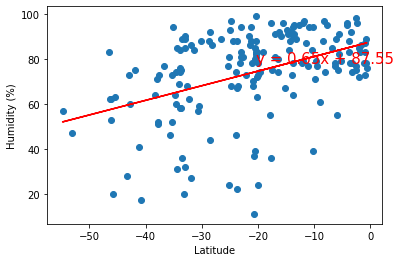

None


In [22]:
# Southern Hemisphere
x_values= southern_hemi["Lat"]
y_values= southern_hemi["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

**Discussion about the linear relationship:** 

Not sure if I did my calculations correct after looking at this graph, but my original assumption was that the closer to a latitude of zero in northern and southern hemispheres would yield a higher average humidty. According to this data the closer you get to the north pole the higher the humidity.
To be sure, there are several points on the northern hemisphere between the latitudes of 10-50 that may be altering the r-value in the norhern hemisphere data. 
At any rate, the humidity seems to be primarily up north. Not what I was expecting.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3219886661866742


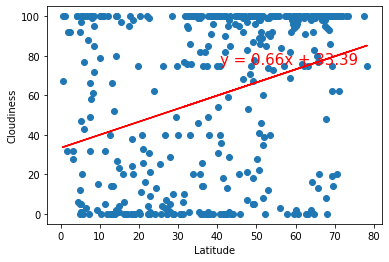

None


In [23]:
# Northern Hemisphere
x_values= northern_hemi["Lat"]
y_values= northern_hemi["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values, y_values))

The r-squared is: 0.3359557720727532


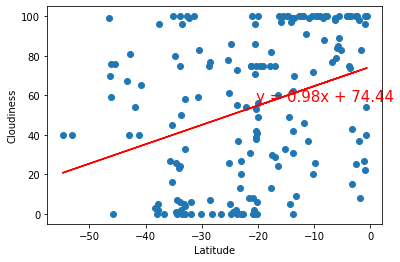

None


In [24]:
# Southern Hemisphere
x_values= southern_hemi["Lat"]
y_values= southern_hemi["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values, y_values))

**Discussion about the linear relationship:** 

This data certainly seems a bit skewed what with how many outliers there seem to be in both scatterplots. There seems to be a high concentration of clouds in and around the equator, or latitude of zero, and the northern hemisphere seems to have a majority of cloud coverage closer to the north pole. 
What I find most interesting is the surprising lack of clouds between latitudes 20 to about 78. Clouds do not appear to like the in-between areas. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06453699064535309


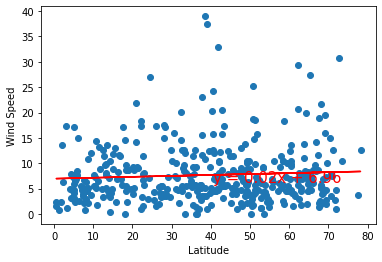

None


In [25]:
# Northern Hemisphere
x_values= northern_hemi["Lat"]
y_values= northern_hemi["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values, y_values))

The r-squared is: -0.3162433495645316


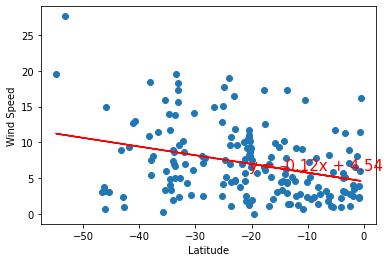

None


In [26]:
# Southern Hemisphere
x_values= southern_hemi["Lat"]
y_values= southern_hemi["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values, y_values))

**Discussion about the linear relationship:** 

Generally speaking, wind speeds are more mild close to the equator. The norther hemisphere seems to be much less susceptible to high wind speeds, regardless of latitude. The southern hemisphere displays wind speeds that are more varied, especially as you start deviating from a latitude of zero. 